## Project_2: Drivers of HDB Resale Price and Prediction
- 03 Preprocessing and Modeling

#### Content
> * [Problem Statement](#problem_statement) 
> * [Data Cleaning](#data_cleaning)
> * [EDA](#eda)
> * [Preprocessing and Modeling](#preprocessing_and_modeling)
> * [Evaluation and Conceptual Understanding](#evaluation_and_conceptual_understanding)
> * [Conclusion and Recommendations](#conclusion_and_recommendations)

---
<a id='problem_statement'></a>
## Problem Statement

Over the years, Singapore has seen the puzzling rise of public housing in the resale market with million dollar price tags, supporting the theory that “decent gains” can still be acquired, especially for HDB flats bought at subsidised prices from the Government. What are the factors contributing to high upside potential for these units? 

Research Findings: Property value is affected by the confluence of macro and micro, demand and supply factors.  

<details><summary> (1) Demand-pull inflation caused by shifts in socio-demographic micro-trends. </summary>
- Many young couples are willing to pay a premium to acquire a resale flat to avoid delaying plans to start a family. 
- More millenials are also opting to remain single and aspire to move out of their nests before they are eligible to purchase a BTO, to alleviate the strain on relationships and their mental health. Covid-19 has likely accelerated the desire to move out for many millenials.
- In response to these socio-demographic trends, the government is rethinking the 35 year-old age requirement for single Singaporeans. could elevate the demand for resale flats even further. 
- Based on a study conducted by the Ministry of Finance, Singaporeans' education, employment, wage outcomes have improved over the generations. Many are gainfully employed, as reflected in the high proportion of Singapore citizens in employment and the low unemployment rate.
</details>
<br> 
<details><summary> (2) Demand-pull inflation in the private housing market. </summary>
- Historical data on private property housing has shown that while sales volume and prices usually dip during a crisis such as a high inflation, high interest rate environment, it has not been the case for the private housing market in Singapore. More wealthy individuals from China and Hong Kong are moving into the Singapore private property market to escape XJP's common prosperity doctrine. This will drive the prices of private condominiums even higher, making it less affordable for many middle income Singaporeans. Being priced out of the private housing market, this substantial group of consumers will turn to the next best alternative - spacious resale flats. Demand for resale flats is projected to increase even more, driving resale prices even higher. 
</details>
<br> 
<details><summary> (3) Material cost-push inflation due to supply-chain disruptions, increasing costs of production. </summary>
- Supply disruptions from the Russia-Ukraine war and ongoing supply chain issues caused prices of core construction materials in Singapore, such as copper, steel, concrete, cement and bricks, to inflate and material costs are projected to remain elevated in the next few quarters. 
- Costs of production has yet to be offset by increasing productivity as digitalisation of the construction workforce is not an overnight process.
</details>
<br>
<details><summary> (4) Material cost-push inflation compounded by high-interest rates. </summary>
- As FEDs are resolute in their fight against inflation, businesses suffer amidst hawkish quantitative tightening (contractionary monetary policy). High interest rates reduce the developer’s ability to service debt, as rising costs are incurred by the organization with no corresponding increase in revenues to offset while the construction is on-going.
- These costs are likely to be passed on to home-buyers. 
</details>
<br>
You are part of the Research & Consultancy team in PropNext. Propnext would like to ride on the wave and increase the number of high-value sales and purchase transactions intermediated by PropNext agents. PropNext is looking to develop an in-house mobile application that is able to predict the selling price of HDB resale flats. The application would help real estate agents detect and look out for units with huge upside potential, so as to rake in higher commissions per sale. The team has to identify high-yield features that contribute to the appreciation of units and report their findings to the software development team in 2 weeks' time. The software developers will then communicate the requirements to the software engineers who would then build the application with the embedded predictive function in collaboration with data scientists. 

Task: Use the Singapore public housing data to create a regression model that predicts the `resale_price` of Housing Development Board (HDB) flats in Singapore.

---
<a id='preprocessing_and_modeling'></a>
## Preprocessing and Modeling
- Model Preparation: Feature Selection

---
### Model Preparation 

*All libraries should be added here.* 

In [1]:
# Import correct modules using accurate aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import scipy.stats as stats
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from datetime import datetime

%matplotlib inline

#### *Import `hdb_train.csv` dataset for preprocessing & modeling.*

In [2]:
# import hdb_train for further inspection
hdb_train = pd.read_pickle('../data/hdb_train.csv') 

In [3]:
# Ensure original cleaned dataset is intact
# hdb_train will be preprocessed for train_test_split and modeling
# X_train, y_train, X_test, y_test
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  category      
 1   tranc_yearmonth            150634 non-null  datetime64[ns]
 2   town                       150634 non-null  category      
 3   flat_type                  150634 non-null  category      
 4   block                      150634 non-null  category      
 5   street_name                150634 non-null  category      
 6   storey_range               150634 non-null  category      
 7   floor_area_sqm             150634 non-null  float64       
 8   flat_model                 150634 non-null  category      
 9   lease_commence_date        150634 non-null  int64         
 10  resale_price               150634 non-null  float64       
 11  tranc_year                 150634 non-null  datetime

In [4]:
# Number of columns in X_train
print(len(hdb_train.columns))
print(hdb_train.info())

77
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  category      
 1   tranc_yearmonth            150634 non-null  datetime64[ns]
 2   town                       150634 non-null  category      
 3   flat_type                  150634 non-null  category      
 4   block                      150634 non-null  category      
 5   street_name                150634 non-null  category      
 6   storey_range               150634 non-null  category      
 7   floor_area_sqm             150634 non-null  float64       
 8   flat_model                 150634 non-null  category      
 9   lease_commence_date        150634 non-null  int64         
 10  resale_price               150634 non-null  float64       
 11  tranc_year                 150634 non-null  datet

*Model Preparation: Drop unneccessary features.*

In [5]:
# Drop columns 'mall_within_500m','mall_within_1km','mall_within_2km' because the data can be found in 'mall_nearest_distance'
hdb_train.drop(['mall_within_500m','mall_within_1km','mall_within_2km'], axis=1, inplace=True)

In [6]:
# Drop columns 'hawker_within_500m','hawker_within_1km','hawker_within_2km' because the data can be found in 'hawker_nearest_distance'
hdb_train.drop(['hawker_within_500m','hawker_within_1km','hawker_within_2km'], axis=1, inplace=True)

In [7]:
# Drop columns 'hawker_food_stalls' and 'hawker_market_stalls' as the information is too granular and insignificant
# information can be represented by 'market_hawker'
hdb_train.drop(['hawker_food_stalls', 'hawker_market_stalls'], axis=1, inplace=True)

In [8]:
# Drop 'tranc_yearmonth', because this information can be represented more granularly in columns 'Tranc_Year', 'Tranc_Month'
hdb_train.drop(['tranc_yearmonth'], axis=1, inplace=True)

In [9]:
# Drop 'lease_commence_date' because this information can also be represented by 'hdb_age' - not the same as 'year_completed'
hdb_train.drop(['lease_commence_date'], axis=1, inplace=True) 

In [10]:
# Drop 'town' because Real Estate companies typically use 'planning_area' instead
hdb_train.drop(['town'], axis=1, inplace=True)

In [11]:
# Drop 'full_flat_type' because this information can be represented more granularly in columns 'flat_type', 'flat_model'
hdb_train.drop(['full_flat_type'], axis=1, inplace=True)

In [12]:
# Drop 'address', 'block', 'street_name' because this information can be represented by the unique id of each unit of residence
# moreover, this is personally identifiable information
hdb_train.drop(['address', 'block', 'street_name'], axis=1, inplace=True)

In [13]:
# Drop 'postal' because it is basically the address of the unit
# We already have the 'planning_area' to represent general location 
hdb_train.drop(['postal'], axis=1, inplace=True)

In [14]:
# Drop 'floor_area_sqm' because this information is the same as 'floor_area_sqft', the latter is more commonly used in the RE industry
hdb_train.drop(['floor_area_sqm'], axis=1, inplace=True)

In [15]:
# Drop 'mid_storey', 'lower', 'upper', 'mid', keeping 'storey_range' and 'max_floor_lvl'
hdb_train.drop(['mid_storey', 'lower', 'upper', 'mid'], axis=1, inplace=True)

In [16]:
# Check for remaining columns = 77-21 = 56
print(len(hdb_train.columns))
print(hdb_train.info())

56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 56 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  category      
 1   flat_type                  150634 non-null  category      
 2   storey_range               150634 non-null  category      
 3   flat_model                 150634 non-null  category      
 4   resale_price               150634 non-null  float64       
 5   tranc_year                 150634 non-null  datetime64[ns]
 6   tranc_month                150634 non-null  datetime64[ns]
 7   floor_area_sqft            150634 non-null  float64       
 8   hdb_age                    150634 non-null  int64         
 9   max_floor_lvl              150634 non-null  int64         
 10  year_completed             150634 non-null  int64         
 11  residential                150634 non-null  categ

*Model Preparation: Drop columns that are not of interest to modelling.*

In [17]:
# Drop columns 'mrt_latitude', 'mrt_longitude' because the data can be found in 'mrt_nearest_distance'
# We are not planning to visualise geospatial data for amenities on a map
hdb_train.drop(['mrt_latitude','mrt_longitude'], axis=1, inplace=True)

In [18]:
# Drop columns 'bus_stop_latitude', 'bus_stop_longitude' because the data can be found in 'bus_stop_nearest_distance'
# We are not planning to visualise geospatial data for amenities on a map
hdb_train.drop(['bus_stop_latitude','bus_stop_longitude'], axis=1, inplace=True)

In [19]:
# Drop columns 'pri_sch_latitude', 'pri_sch_longitude' because the data can be found in 'pri_sch_nearest_distance'
# We are not planning to visualise geospatial data for amenities on a map
hdb_train.drop(['pri_sch_latitude','pri_sch_longitude'], axis=1, inplace=True)

In [20]:
# Drop columns 'sec_sch_latitude', 'sec_sch_longitude' because the data can be found in 'sec_sch_nearest_dist'
# We are not planning to visualise geospatial data for amenities on a map
hdb_train.drop(['sec_sch_latitude','sec_sch_longitude'], axis=1, inplace=True)

In [21]:
# Check to see if there are 56-8 columns left
print(len(hdb_train.columns))
print(hdb_train.info())

48
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  category      
 1   flat_type                  150634 non-null  category      
 2   storey_range               150634 non-null  category      
 3   flat_model                 150634 non-null  category      
 4   resale_price               150634 non-null  float64       
 5   tranc_year                 150634 non-null  datetime64[ns]
 6   tranc_month                150634 non-null  datetime64[ns]
 7   floor_area_sqft            150634 non-null  float64       
 8   hdb_age                    150634 non-null  int64         
 9   max_floor_lvl              150634 non-null  int64         
 10  year_completed             150634 non-null  int64         
 11  residential                150634 non-null  categ

---
### Feature Selection #1 : Numeric Variables (float64, int64)

*Filter numeric features by Variance.*

In [22]:
hdb_train.var(numeric_only=True).sort_values(ascending=False)

resale_price                 2.053706e+10
hawker_nearest_distance      1.159286e+06
mrt_nearest_distance         1.843552e+05
mall_nearest_distance        1.352410e+05
sec_sch_nearest_dist         9.552196e+04
floor_area_sqft              6.899780e+04
pri_sch_nearest_distance     5.511269e+04
3room_sold                   4.726325e+03
total_dwelling_units         3.404684e+03
bus_stop_nearest_distance    3.088342e+03
4room_sold                   2.052280e+03
5room_sold                   1.119342e+03
cutoff_point                 4.004197e+02
exec_sold                    3.660285e+02
vacancy                      3.205503e+02
year_completed               1.488933e+02
hdb_age                      1.473512e+02
2room_sold                   1.372137e+02
2room_rental                 1.253016e+02
max_floor_lvl                3.884396e+01
1room_sold                   3.537835e+01
studio_apartment_sold        2.862911e+01
1room_rental                 4.114166e+00
multigen_sold                1.289

Comments: 
1. Remove numeric features (longitude, latitude) with variance close to 0 - this means that their values are always pretty much the same. It is unlikely that they (features with low variance) are good predictors of the target variable, resale price which has high variance.
2. Do not remove columns related to number of Xroom rental residental units in the block or number of Xroom residential units in the block - we consider them to be a set.
> * `Xroom_rental`: all except for '2room_rental' have very low variance, hence 'Xroom_rental' could be a relevant feature that could explain the variation in resale price.
> * `Xroom_sold`: '3room_sold', '4room_sold', '5room_sold', 'exec_sold', '2room_sold' has moderately high variance, hence 'Xroom_sold' could be relevant in explaining variability in resale price.

In [23]:
# remove 'longitude' and 'latitude'
hdb_train.drop(['latitude','longitude'], axis=1, inplace=True)

In [24]:
# Check to see if there are 48-2 columns left
print(len(hdb_train.columns))

46


*Identify numeric features that are weakly correlated to target variable.*

In [25]:
# Filter numeric features by correlation
abs(hdb_train.corr(numeric_only = True)['resale_price']).sort_values(ascending=False)

resale_price                 1.000000
floor_area_sqft              0.654120
max_floor_lvl                0.495650
3room_sold                   0.410368
5room_sold                   0.359434
year_completed               0.353698
hdb_age                      0.350337
exec_sold                    0.337500
2room_sold                   0.145287
total_dwelling_units         0.140725
mrt_nearest_distance         0.128222
sec_sch_nearest_dist         0.095339
4room_sold                   0.092600
mall_nearest_distance        0.087370
3room_rental                 0.079965
2room_rental                 0.077548
studio_apartment_sold        0.040312
1room_sold                   0.039434
1room_rental                 0.037993
multigen_sold                0.037406
cutoff_point                 0.034572
bus_stop_nearest_distance    0.031940
vacancy                      0.016140
hawker_nearest_distance      0.014537
other_room_rental            0.013049
pri_sch_nearest_distance     0.011004
Name: resale

 Assumptions: 
 - 0.2 − 0.39 a weak correlation. 
 - 0.4 − 0.59 is a moderate correlation. 
 - 0.6 − 0.79 is a strong correlation. 
 - 0.8 − 1 is a very strong correlation.
 
 Comments: 
 - Drop all numeric variables that are weakly correlated to target variable.
 - `3room_sold`, `max_floor_lvl`, and `floor_area_sqft` have high correlation with the target, it tells you that these features heavily influences the target and should be included in X_train when you are training the model.

*Check for Multicollinearity - Numeric Features Only.*
1. Correlation Matrix - we are here!
2. Variance Inflation Factor (VIF)

In [26]:
from scipy.stats import pearsonr

In [27]:
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 46 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  category      
 1   flat_type                  150634 non-null  category      
 2   storey_range               150634 non-null  category      
 3   flat_model                 150634 non-null  category      
 4   resale_price               150634 non-null  float64       
 5   tranc_year                 150634 non-null  datetime64[ns]
 6   tranc_month                150634 non-null  datetime64[ns]
 7   floor_area_sqft            150634 non-null  float64       
 8   hdb_age                    150634 non-null  int64         
 9   max_floor_lvl              150634 non-null  int64         
 10  year_completed             150634 non-null  int64         
 11  residential                150634 non-null  category

In [28]:
# Create hdb_train_numeric for numerical features
hdb_train_numeric = hdb_train.select_dtypes(exclude = ['category', 'datetime64[ns]', 'object'])
type(hdb_train_numeric)

pandas.core.frame.DataFrame

In [29]:
# Select the features
features = hdb_train_numeric.columns.tolist()

# Convert the data into a numpy array
X = hdb_train_numeric[features].values

In [30]:
# Identify the highly correlated features
correlated_features = []
correlation_matrix = np.corrcoef(X.T)
for i in range(0, len(features)):
    for j in range(i + 1, len(features)):
        if abs(correlation_matrix[i, j]) > 0.6:
            correlated_features.append([features[i], features[j]])

In [31]:
# Print the correlated features in a table
print("Highly Correlated Features:")
print("------------------------------------------------------------------")
print("Feature 1".ljust(20), "Feature 2".ljust(20), "Correlation Coefficient")
print("------------------------------------------------------------------")
for feature in correlated_features:
    corr, _ = pearsonr(hdb_train_numeric[feature[0]], hdb_train_numeric[feature[1]])
    print(feature[0].ljust(20), feature[1].ljust(20), round(corr, 2))

Highly Correlated Features:
------------------------------------------------------------------
Feature 1            Feature 2            Correlation Coefficient
------------------------------------------------------------------
resale_price         floor_area_sqft      0.65
hdb_age              year_completed       -0.99
total_dwelling_units 3room_sold           0.68


/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gn/T/ipykernel_29387/574869468.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


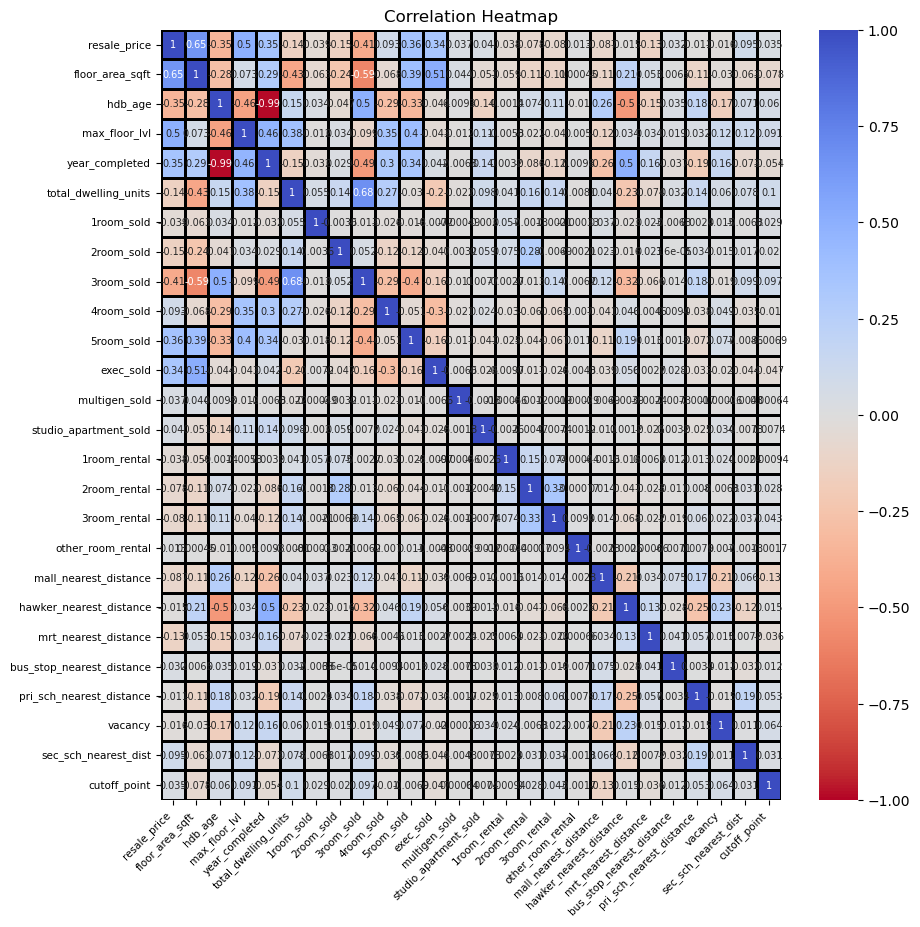

In [32]:
# Correlation heatmap
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(hdb_train.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
#ax.set_ylim(0 ,5)
plt.xticks(rotation=45, ha='right', fontsize=7.5)
plt.yticks(rotation=0, fontsize=7.5)
plt.title('Correlation Heatmap')
fig.show();

Comment: 

- The correlation matrix above for the numeric features indicates a high absolute correlation of 0.99 and 0.68 between (hdb_age, year_completed) and (total_dwelling_units, 3rooms_sold) respectively. This indicates a possible problem of multicollinearity and the need for further investigation.
- You can create interaction terms for 'hdb_age' and 'year_completed', as well as for 'total_dwelling_units' and '3room_sold' | Drop `hdb_age`, `year_completed`, `total_dwelling_units`, and `3room_sold` from hdb_train. This can be a possible solution to combat multicollinearity. For now, retain these features.

*Check for Multicollinearity.*
1. Correlation Matrix
2. Variance Inflation Factor (VIF) - we are here!

Interpreting VIF Values
The valid value for VIF ranges from 1 to infinity. A rule of thumb for interpreting VIF values is:

> * 1 — features are not correlated
> * 1<VIF<5 — features are moderately correlated
> * VIF>5 — features are highly correlated
> * VIF>10 — high correlation between features and is a cause for concern
> * VIF = inf — perfect correlation between features and is a cause for concern

In [33]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['tolerance'] = 1/vif.VIF
    vif['meanVIF'] = vif.VIF.mean()

    return(vif)

calc_vif(hdb_train.drop('resale_price',axis=1).select_dtypes(include=['int64','float64']))

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF,tolerance,meanVIF
0,floor_area_sqft,47.771408,0.020933,inf
1,hdb_age,15.515178,0.064453,inf
2,max_floor_lvl,15.775790,0.063388,inf
3,year_completed,204.763856,0.004884,inf
4,total_dwelling_units,inf,0.000000,inf
5,1room_sold,inf,0.000000,inf
6,2room_sold,inf,0.000000,inf
7,3room_sold,inf,0.000000,inf
8,4room_sold,inf,0.000000,inf
9,5room_sold,inf,0.000000,inf


In [34]:
# Remove features with highest VIF (inf) and compute VIFs again
calc_vif(hdb_train.drop(['resale_price', 'total_dwelling_units', '1room_sold', '2room_sold', 
                       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 
                       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 
                       'other_room_rental'],axis=1).select_dtypes(include=['int64','float64']))

,variables,VIF,tolerance,meanVIF
0,floor_area_sqft,18.809193,0.053165,31.697109
1,hdb_age,12.749448,0.078435,31.697109
2,max_floor_lvl,9.941738,0.100586,31.697109
3,year_completed,182.513287,0.005479,31.697109
4,mall_nearest_distance,4.971416,0.201150,31.697109
5,hawker_nearest_distance,3.418124,0.292558,31.697109
6,mrt_nearest_distance,4.383607,0.228123,31.697109
7,bus_stop_nearest_distance,5.368312,0.186278,31.697109
8,pri_sch_nearest_distance,4.370016,0.228832,31.697109
9,vacancy,11.723574,0.085298,31.697109


In [35]:
# Remove features with highest VIF (>100) and compute VIFs again
calc_vif(hdb_train.drop(['resale_price', 'total_dwelling_units', '1room_sold', '2room_sold', 
                       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 
                       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 
                       'other_room_rental', 'year_completed', 'cutoff_point'], axis=1).select_dtypes(include=['int64','float64']))

,variables,VIF,tolerance,meanVIF
0,floor_area_sqft,12.518517,0.079882,6.309176
1,hdb_age,7.608743,0.131428,6.309176
2,max_floor_lvl,7.479362,0.133701,6.309176
3,mall_nearest_distance,4.670062,0.214130,6.309176
4,hawker_nearest_distance,3.035668,0.329417,6.309176
5,mrt_nearest_distance,4.212828,0.237370,6.309176
6,bus_stop_nearest_distance,5.204664,0.192135,6.309176
7,pri_sch_nearest_distance,4.309564,0.232042,6.309176
8,vacancy,10.121438,0.098800,6.309176
9,sec_sch_nearest_dist,3.930913,0.254394,6.309176


In [36]:
# Remove features with highest VIF (>10) and compute VIFs again
# Instead of removing 'floor_area_sqft', remove the second highest VIF - 'vacancy'
# 'floor_area_sqft' is a strong predictor of target 'resale_price
calc_vif(hdb_train.drop(['resale_price', 'total_dwelling_units', '1room_sold', '2room_sold', 
                       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 
                       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 
                       'other_room_rental', 'year_completed', 'cutoff_point', 'vacancy'],
                      axis=1).select_dtypes(include=['int64','float64']))

,variables,VIF,tolerance,meanVIF
0,floor_area_sqft,12.215139,0.081866,5.622002
1,hdb_age,6.825577,0.146508,5.622002
2,max_floor_lvl,6.711398,0.149000,5.622002
3,mall_nearest_distance,4.626761,0.216134,5.622002
4,hawker_nearest_distance,2.668176,0.374788,5.622002
5,mrt_nearest_distance,4.194768,0.238392,5.622002
6,bus_stop_nearest_distance,5.173140,0.193306,5.622002
7,pri_sch_nearest_distance,4.267979,0.234303,5.622002
8,sec_sch_nearest_dist,3.915084,0.255422,5.622002


Comments:
- There is definitely multicollinearity in our continuous features. 
- Even after removing several features, the highest VIF for `floor_area_sqft` remains above 10. I am choosing to retain it as I believe it is a significant predictor of resale price.

In [37]:
# Drop columns with high VIF
hdb_train.drop(['total_dwelling_units', '1room_sold', '2room_sold', '3room_sold', 
              '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 
              'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 
              'other_room_rental', 'year_completed', 'cutoff_point', 'vacancy'], axis=1, inplace=True)

In [38]:
# There should be 46-16 features remaining
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  category      
 1   flat_type                  150634 non-null  category      
 2   storey_range               150634 non-null  category      
 3   flat_model                 150634 non-null  category      
 4   resale_price               150634 non-null  float64       
 5   tranc_year                 150634 non-null  datetime64[ns]
 6   tranc_month                150634 non-null  datetime64[ns]
 7   floor_area_sqft            150634 non-null  float64       
 8   hdb_age                    150634 non-null  int64         
 9   max_floor_lvl              150634 non-null  int64         
 10  residential                150634 non-null  category      
 11  commercial                 150634 non-null  category

---
### Feature Selection #2 : Categorical Variables (Boolean, Nominal, Ordinal)

*Remove redundant categorical variables.*

In [39]:
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  category      
 1   flat_type                  150634 non-null  category      
 2   storey_range               150634 non-null  category      
 3   flat_model                 150634 non-null  category      
 4   resale_price               150634 non-null  float64       
 5   tranc_year                 150634 non-null  datetime64[ns]
 6   tranc_month                150634 non-null  datetime64[ns]
 7   floor_area_sqft            150634 non-null  float64       
 8   hdb_age                    150634 non-null  int64         
 9   max_floor_lvl              150634 non-null  int64         
 10  residential                150634 non-null  category      
 11  commercial                 150634 non-null  category

In [40]:
# Check out categorical variables - remove unneccessary columns
hdb_train_cat = hdb_train.select_dtypes(include = 'category')
hdb_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   150634 non-null  category
 1   flat_type            150634 non-null  category
 2   storey_range         150634 non-null  category
 3   flat_model           150634 non-null  category
 4   residential          150634 non-null  category
 5   commercial           150634 non-null  category
 6   market_hawker        150634 non-null  category
 7   multistorey_carpark  150634 non-null  category
 8   precinct_pavilion    150634 non-null  category
 9   planning_area        150634 non-null  category
 10  mrt_name             150634 non-null  category
 11  bus_interchange      150634 non-null  category
 12  mrt_interchange      150634 non-null  category
 13  bus_stop_name        150634 non-null  category
 14  pri_sch_name         150634 non-null  category
 15  

In [41]:
for i in hdb_train_cat.columns: 
    print(f'====={ i }=====')
    print(hdb_train_cat[i].unique())

=====id=====
[88471, 122598, 170897, 86070, 153632, ..., 39814, 147177, 179087, 21309, 185947]
Length: 150634
Categories (150634, int64): [1, 2, 3, 4, ..., 185961, 185962, 185963, 185966]
=====flat_type=====
['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM', 'MULTI-GENERATION']
Categories (7, object): ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
=====storey_range=====
['10 TO 12', '07 TO 09', '13 TO 15', '01 TO 05', '01 TO 03', ..., '49 TO 51', '46 TO 48', '26 TO 30', '36 TO 40', '31 TO 35']
Length: 25
Categories (25, object): ['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', ..., '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51']
=====flat_model=====
['Model A', 'Improved', 'Apartment', 'Simplified', 'New Generation', ..., 'Multi Generation', 'Type S2', 'Premium Maisonette', 'Improved-Maisonette', '2-room']
Length: 20
Categories (20, object): ['2-room', 'Adjoined flat', 'Apartment', 'DBSS', ..., 'Standard', 'Terrace', 'Type S1', 'Type S2

Comments: 
1. Drop 'residential' as there is only 1 unique value hence it will not add predictive value to the target variable. 
2. Drop 'id' as it is just an index / identifier.

In [42]:
# Drop columns 'id' and 'residential' from X_train for modelling
hdb_train.drop(['id','residential'], axis=1, inplace=True)

In [43]:
# There should be 30-2 features remaining, 16 of which are categorical
len(hdb_train.columns)

28

*Label & Dummy Encoding.*

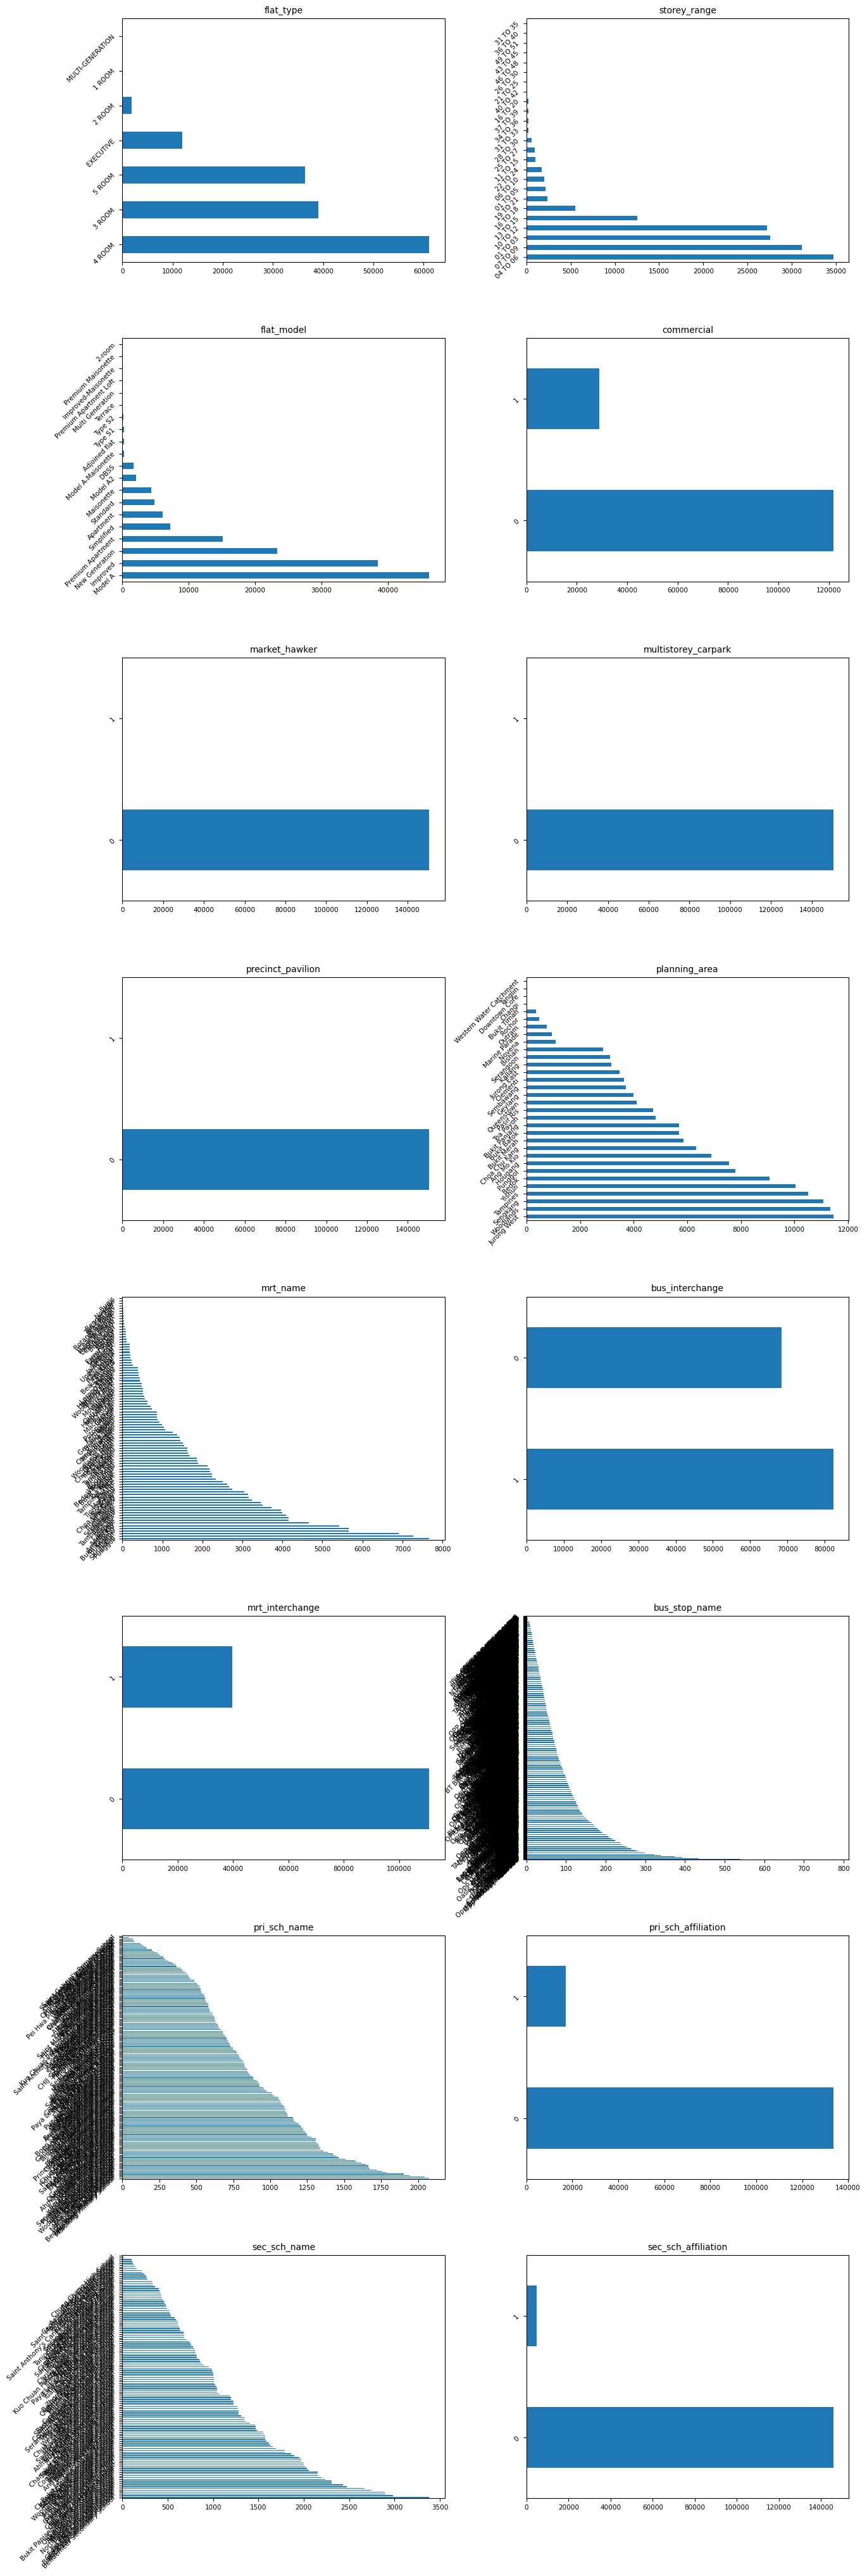

In [44]:
# Frequency plots for categorical features
fig = plt.figure(figsize=(15,45))
for count, col in enumerate(hdb_train.select_dtypes(include=['category']).columns):
    fig.add_subplot(8, 2, count+1)
    hdb_train[col].value_counts().plot.barh()
    plt.title(col, fontsize=10)
    plt.xticks(rotation=0, fontsize=7.5)
    plt.yticks(rotation=45, fontsize=7.5)
    plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])

Comments: 
<br> 

| Categorical Feature | Datatype | Comment | Action Item |
|---|---|---|---|
|`flat_type`|ordinal|`flat_type` has not many instances of 'multi-generation' and '1 room'| retain 'multi-generation' and '1 room', label encode `flat_type` because it is ordinal|
|`storey_range`|ordinal|`storey_range` means nothing if not considered in relation to `max_floor_lvl`| label encode `storey_range` according to storey ranges to give classes different weights|
|`flat_model`|nominal|`flat_model` should be further grouped to reduce the number of classes| regroup to reduce the number of classes, dummy encode `flat_model`|
|`planning_area`|nominal| expected to be a significant predictor based on common sense | include in `X_train`, dummy encode `planning_area`|
|`mrt_name`|nominal|`mrt_name` has many classes and one-hot encoding it might lead to a very sparse matrix|drop column, too many classes|
|`bus_stop_name`|nominal|`bus_stop_name` has many classes and one-hot encoding it might lead to a very sparse matrix|drop column, too many classes|
|`pri_sch_name`|nominal|`pri_sch_name` has many classes and one-hot encoding it might lead to a very sparse matrix |drop column, too many classes|
|`sec_sch_name`|nominal|`sec_sch_name` has many classes and one-hot encoding it might lead to a very sparse matrix|drop column, too many classes|
|`pri_sch_affiliation`|boolean|`pri_sch_affilitation` has highly skewed distribution, scatterplot and unique value counts corroborate finding that correlation coefficient is weak though statistically significant|drop column|
|`sec_sch_affiliation`|boolean|`sec_sch_affiliation` has highly skewed distribution, scatterplot and unique value counts corroborate finding that correlation coefficient is weak and statistically insignificant|drop column|
|`commercial`|boolean|`commercial` has highly skewed distribution, scatterplot and unique value counts corroborate finding that correlation coefficient is weak though statistically significant|drop column|
|`market_hawker`|boolean|`market_hawker` has highly skewed distribution, scatterplot and unique value counts corroborate finding that correlation coefficient is weak though statistically significant|drop column|
|`multistorey_carpark`|boolean|`multistorey_carpark` has highly skewed distribution, scatterplot and unique value counts corroborate finding that correlation coefficient is weak though statistically significant|drop column|
|`precinct_pavilion`|boolean|`precinct_pavilion` has highly skewed distribution, scatterplot and unique value counts corroborate finding that correlation coefficient is weak and statistically insignificant|drop column|
|`mrt_interchange`|boolean|`mrt_interchange` has moderately skewed distribution, scatterplot and unique value counts corroborate finding that correlation coefficient is weak though statistically significant|drop column|
|`bus_interchange`|boolean|`bus_interchange` has distribution that is slightly skewed, scatterplot and unique value counts corroborate finding that correlation coefficient is weak and statistically insignificant|drop column|
<br> 

*Drop columns with too many classes.*
- `mrt_name`
- `bus_stop_name`
- `pri_sch_name`
- `sec_sch_name`

In [45]:
# Drop 'mrt_name', 'bus_stop_name', 'pri_sch_name', and 'sec_sch_name'
# Too many classes and OHE them will lead to a very sparse matrix
# Curse of dimensionality
hdb_train.drop(['mrt_name', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name'], axis=1, inplace=True)

In [46]:
# There should be 28-4 features remaining, 12 of which are categorical (boolean, nominal, ordinal)
len(hdb_train.columns)

24

*Label encode categorical variables which are ordinal in nature.*
- `flat_type`
- `storey_range`

In [47]:
# Check out unique classes and value count for 'flat_type'
hdb_train['flat_type'].value_counts()

4 ROOM              61136
3 ROOM              39060
5 ROOM              36415
EXECUTIVE           11989
2 ROOM               1896
1 ROOM                 82
MULTI-GENERATION       56
Name: flat_type, dtype: int64

In [48]:
# Label encode 'flat_type'
# Datatype of `flat_type` column has been converted to category dtype

# Assign numerical values and store in another column
hdb_train['flat_type_cat'] = hdb_train['flat_type'].cat.codes
hdb_train['flat_type_cat'].value_counts()

3    61136
2    39060
4    36415
5    11989
1     1896
0       82
6       56
Name: flat_type_cat, dtype: int64

In [49]:
# Drop 'flat_type' column, because you have 'flat_type_cat'
hdb_train.drop('flat_type', axis=1, inplace=True)

In [50]:
# Check if 'flat_type' has been replaced with 'flat_type_cat'
# Note that 'flat_type_cat' is now a numerical (discrete) variable - int8
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   storey_range               150634 non-null  category      
 1   flat_model                 150634 non-null  category      
 2   resale_price               150634 non-null  float64       
 3   tranc_year                 150634 non-null  datetime64[ns]
 4   tranc_month                150634 non-null  datetime64[ns]
 5   floor_area_sqft            150634 non-null  float64       
 6   hdb_age                    150634 non-null  int64         
 7   max_floor_lvl              150634 non-null  int64         
 8   commercial                 150634 non-null  category      
 9   market_hawker              150634 non-null  category      
 10  multistorey_carpark        150634 non-null  category      
 11  precinct_pavilion          150634 non-null  category

In [51]:
# Check out unique classes and value count for 'storey_range'
hdb_train['storey_range'].value_counts()

04 TO 06    34699
07 TO 09    31119
01 TO 03    27592
10 TO 12    27189
13 TO 15    12553
16 TO 18     5549
19 TO 21     2387
01 TO 05     2168
06 TO 10     1985
22 TO 24     1695
11 TO 15     1008
25 TO 27      912
28 TO 30      566
31 TO 33      247
34 TO 36      246
37 TO 39      226
16 TO 20      212
40 TO 42      108
21 TO 25       82
26 TO 30       29
46 TO 48       24
43 TO 45       21
49 TO 51       10
36 TO 40        5
31 TO 35        2
Name: storey_range, dtype: int64

In [52]:
# Label encode 'storey_range'
# Datatype of `storey_range` column has been converted to category dtype

# Assign numerical values and store in another column
hdb_train['storey_range_cat'] = hdb_train['storey_range'].cat.codes
hdb_train['storey_range_cat'].value_counts()

2     34699
4     31119
0     27592
5     27189
7     12553
8      5549
10     2387
1      2168
3      1985
12     1695
6      1008
13      912
15      566
16      247
18      246
20      226
9       212
21      108
11       82
14       29
23       24
22       21
24       10
19        5
17        2
Name: storey_range_cat, dtype: int64

In [53]:
# Drop 'storey_range' column, because now you have 'storey_range_cat'
hdb_train.drop('storey_range', axis=1, inplace=True)

In [54]:
# Check if 'storey_range' has been replaced with 'storey_range_cat'
# Note that 'storey_range_cat' is now a numerical (discrete) variable - int8
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   flat_model                 150634 non-null  category      
 1   resale_price               150634 non-null  float64       
 2   tranc_year                 150634 non-null  datetime64[ns]
 3   tranc_month                150634 non-null  datetime64[ns]
 4   floor_area_sqft            150634 non-null  float64       
 5   hdb_age                    150634 non-null  int64         
 6   max_floor_lvl              150634 non-null  int64         
 7   commercial                 150634 non-null  category      
 8   market_hawker              150634 non-null  category      
 9   multistorey_carpark        150634 non-null  category      
 10  precinct_pavilion          150634 non-null  category      
 11  planning_area              150634 non-null  category

*Dummy encode categorical variables which are nominal in nature.* 
- `flat_model`
- `planning_area`

In [55]:
# Check out unique classes and value count for 'flat_model'
hdb_train['flat_model'].value_counts()

Model A                   46261
Improved                  38514
New Generation            23366
Premium Apartment         15091
Simplified                 7239
Apartment                  6080
Standard                   4867
Maisonette                 4364
Model A2                   2064
DBSS                       1658
Model A-Maisonette          262
Adjoined flat               260
Type S1                     242
Type S2                     127
Terrace                      95
Multi Generation             56
Premium Apartment Loft       50
Improved-Maisonette          19
Premium Maisonette           15
2-room                        4
Name: flat_model, dtype: int64

In [56]:
# Further group classes in `flat_model` to reduce the number of classes
# Dummy encode `flat_model`

# Re-categorize `flat_model` to reduce number of classes
# Categories: 'Model A', 'Maisonette', 'Special', 'Apartment', 'Standard', 'New Generation', 'Multi Generation'

replace_values = {'Model A-Maisonette':'Maisonette', 
                  'Improved-Maisonette':'Maisonette',
                  'Premium Maisonette':'Maisonette',
                  'Model A2':'Model A',
                  'Simplified':'Model A',  
                  'Type S1':'Special',
                  'Type S2':'Special',
                  'DBSS':'Special',
                  'Adjoined flat':'Special',
                  'Terrace':'Special',
                  'Premium Apartment':'Apartment',
                  'Premium Apartment Loft':'Apartment',
                  'Improved':'Standard',
                  '2-room':'Standard'} # `2-room` is missing in `flat_model` for test.csv 

hdb_train.replace({'flat_model': replace_values}, inplace=True)

# Check if 'flat_model' values have been re-classified
hdb_train['flat_model'].value_counts()

Model A             55564
Standard            43385
New Generation      23366
Apartment           21221
Maisonette           4660
Special              2382
Multi Generation       56
Name: flat_model, dtype: int64

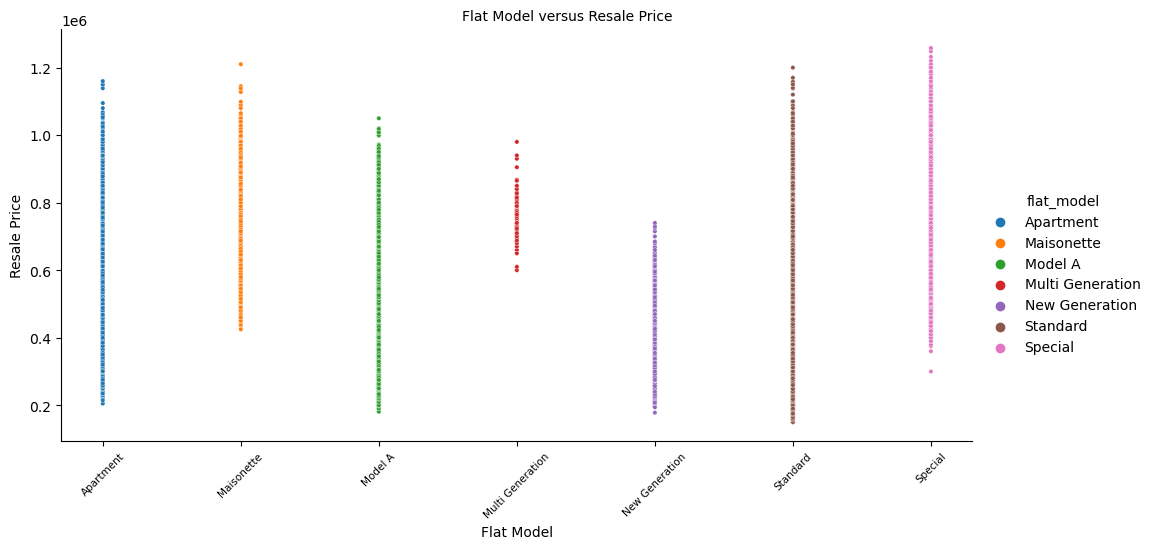

In [57]:
# Plot relational plot to visualise relationship between reclassified `flat_model` and `resale_price`
g = sns.relplot(x='flat_model', y="resale_price", hue ='flat_model', data=hdb_train, height = 5, aspect = 2, s = 10, palette='tab10')
g.fig.suptitle("Flat Model versus Resale Price", fontsize=10)
plt.xlabel('Flat Model', fontsize=10)
plt.ylabel('Resale Price', fontsize=10)
plt.xticks(rotation=45, fontsize=7.5);

In [58]:
# Dummy encode 'flat_model'
hdb_train = pd.get_dummies(hdb_train, columns=['flat_model'], prefix=['flat_model'])

# Remove `flat_model_Standard`, setting it as the baseline
hdb_train = hdb_train.drop('flat_model_Standard', axis=1)

In [59]:
# Check to see if 'flat_model' has been dummy encoded into 7-1 other dummy variables 
# 'flat_model_apartment','flat_model_maisonette', 'flat_model_model_A', 
# 'flat_model_multi_generation','flat_model_new_generation', 'flat_model_special'
# Note that 6 new dummy variables are now numerical (discrete) in nature - uint8
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   resale_price                 150634 non-null  float64       
 1   tranc_year                   150634 non-null  datetime64[ns]
 2   tranc_month                  150634 non-null  datetime64[ns]
 3   floor_area_sqft              150634 non-null  float64       
 4   hdb_age                      150634 non-null  int64         
 5   max_floor_lvl                150634 non-null  int64         
 6   commercial                   150634 non-null  category      
 7   market_hawker                150634 non-null  category      
 8   multistorey_carpark          150634 non-null  category      
 9   precinct_pavilion            150634 non-null  category      
 10  planning_area                150634 non-null  category      
 11  mall_nearest_distance     

In [60]:
# Consider re-classifying values based on district
# or region (north/south/east/west/central or CCR/RCR/OCR)
print(hdb_train['planning_area'].value_counts())
print(hdb_train['planning_area'].nunique())

Jurong West                11451
Woodlands                  11334
Sengkang                   11069
Tampines                   10506
Yishun                     10042
Bedok                       9062
Punggol                     7793
Hougang                     7557
Ang Mo Kio                  6908
Choa Chu Kang               6328
Bukit Merah                 5854
Bukit Batok                 5700
Bukit Panjang               5686
Toa Payoh                   4817
Pasir Ris                   4725
Queenstown                  4103
Geylang                     3986
Sembawang                   3723
Clementi                    3633
Jurong East                 3470
Kallang                     3163
Serangoon                   3121
Bishan                      2871
Novena                      1091
Marine Parade                943
Outram                       759
Rochor                       468
Bukit Timah                  362
Changi                        38
Downtown Core                 31
Tanglin   

In [61]:
# Re-categorize `planning_area` to reduce number of classes
# Categories: 'north', 'east', 'west', 'central', 'north_east'
# Source: URA

replace_values = {'Jurong West':'west',
                  'Choa Chu Kang':'west',
                  'Bukit Batok':'west',
                  'Bukit Panjang':'west',
                  'Clementi':'west',
                  'Jurong East':'west',
                  'Western Water Catchment':'west',
                  'Woodlands':'north',
                  'Yishun':'north',
                  'Sembawang':'north',
                  'Sengkang':'north_east',
                  'Ang Mo Kio':'north_east',
                  'Serangoon':'north_east',
                  'Hougang':'north_east',
                  'Bukit Merah':'central',
                  'Toa Payoh':'central',
                  'Bishan':'central',
                  'Novena':'central',
                  'Downtown Core':'central',
                  'Tanglin':'central',
                  'Outram':'central',
                  'Rochor':'central',
                  'Bukit Timah':'central',
                  'Queenstown':'central',
                  'Marine Parade':'central',
                  'Geylang':'central',
                  'Kallang':'central',
                  'Tampines':'east',
                  'Bedok':'east',
                  'Punggol':'east',
                  'Pasir Ris':'east',
                  'Changi':'east'}

hdb_train.replace({'planning_area': replace_values}, inplace=True)

# Check if 'planning_area' values have been re-classified
hdb_train['planning_area'].value_counts()

west          36283
east          32124
north_east    28655
central       28473
north         25099
Name: planning_area, dtype: int64

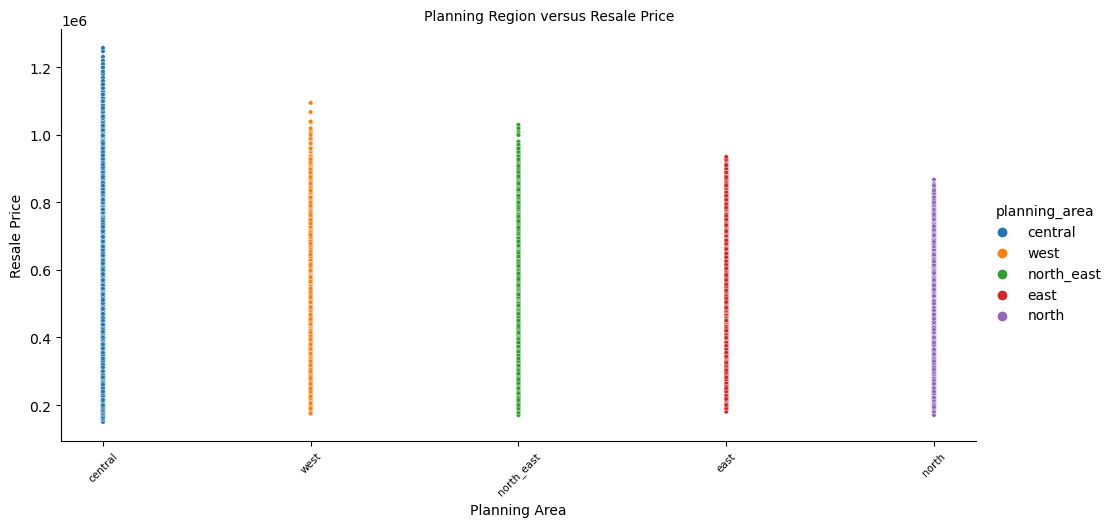

In [62]:
# Plot relational plot to visualise relationship between reclassified `planning_area` and `resale_price`
g = sns.relplot(x='planning_area', y="resale_price", hue ='planning_area', data=hdb_train, height = 5, aspect = 2, s = 10, palette='tab10')
g.fig.suptitle("Planning Region versus Resale Price", fontsize=10)
plt.xlabel('Planning Area', fontsize=10)
plt.ylabel('Resale Price', fontsize=10)
plt.xticks(rotation=45, fontsize=7.5);

In [63]:
# Dummy encode 'planning_area'
hdb_train = pd.get_dummies(hdb_train, columns=['planning_area'], prefix=['planning_area'], drop_first=True) # 'planning_area_central is baseline

In [64]:
# Check to see if 'planning_area' has been dummy encoded into 5-1 other dummy variables 
# 'planning_area_west','planning_area_north_east', 'planning_area_east', 'planning_area_north'
# Note that 4 new dummy variables are now numerical (discrete) in nature - uint8
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   resale_price                 150634 non-null  float64       
 1   tranc_year                   150634 non-null  datetime64[ns]
 2   tranc_month                  150634 non-null  datetime64[ns]
 3   floor_area_sqft              150634 non-null  float64       
 4   hdb_age                      150634 non-null  int64         
 5   max_floor_lvl                150634 non-null  int64         
 6   commercial                   150634 non-null  category      
 7   market_hawker                150634 non-null  category      
 8   multistorey_carpark          150634 non-null  category      
 9   precinct_pavilion            150634 non-null  category      
 10  mall_nearest_distance        150634 non-null  float64       
 11  hawker_nearest_distance   

*Refer to scatterplots in EDA for insights on whether there are noteworthy differences in target between dichotomous categories.*
- Retain categorical boolean variables that produces significant difference in output.
- Discard categorical boolean variables that do not seem to be explanatory factors for difference in output.

In [65]:
# Handle variables with dichotomous values + distributions that are highly skewed - will affect machine learning
# i.e.,'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'pri_sch_affiliation', 'sec_sch_affiliation'

# Variables with moderately, slightly skewed data i.e., 'bus_interchange', 'mrt_interchange'

*List out unique counts of each category for all boolean variables.*

In [66]:
# Make a list of all boolean variables
X_boolean = ['pri_sch_affiliation', 'sec_sch_affiliation', 'commercial', 'market_hawker', 
             'multistorey_carpark', 'precinct_pavilion', 'mrt_interchange', 'bus_interchange']

In [67]:
# List out the unique counts of each boolean variable
for i in X_boolean: 
    print('value_counts')
    print(hdb_train[i].value_counts())
    print('==========================================')

value_counts
0    133583
1     17051
Name: pri_sch_affiliation, dtype: int64
value_counts
0    145832
1      4802
Name: sec_sch_affiliation, dtype: int64
value_counts
0    121815
1     28819
Name: commercial, dtype: int64
value_counts
0    150619
1        15
Name: market_hawker, dtype: int64
value_counts
0    150592
1        42
Name: multistorey_carpark, dtype: int64
value_counts
0    150499
1       135
Name: precinct_pavilion, dtype: int64
value_counts
0    110863
1     39771
Name: mrt_interchange, dtype: int64
value_counts
1    82301
0    68333
Name: bus_interchange, dtype: int64


Comment: Retain boolean fields, they do not affect linear regression much when skewed. If any, it actually helps with the prediction, especially if the 2 groups produce significant difference in target variable.

*Perform big-picture method to understand if a continuous and categorical are significantly correlated — point biserial correlation.*
* The point biserial calculation assumes that the continuous variable is normally distributed and homoscedastic.
* Do you have to plot distribution and log transform distribution of continuous variable 'resale_price' because it's distribution is right-skewed? 

In [68]:
# Ignore warning - frame.append method is deprecated and will be removed from pandas in a future version, 
# use pandas.concat instead

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [69]:
# Similar to the Pearson coefficient, the point biserial correlation can range from -1 to +1

X_boolean = ['pri_sch_affiliation', 'sec_sch_affiliation', 'commercial', 'market_hawker', 
             'multistorey_carpark', 'precinct_pavilion', 'mrt_interchange', 'bus_interchange']

df = pd.DataFrame(columns=[])

for i in X_boolean:
    # Categorical (boolean) independent variable
    x = hdb_train[i].values
    # Continuous numerical target variable
    y = hdb_train['resale_price'].values
    
    # Insert row to the dataframe using DataFrame.append(), 
    new_row = {'X':i, 'correlation':stats.pointbiserialr(x, y)[0], 'p_value':stats.pointbiserialr(x, y)[1]}
    df = df.append(new_row, ignore_index=True) 
    
print(df) 

                     X  correlation        p_value
0  pri_sch_affiliation     0.030931   3.245046e-33
1  sec_sch_affiliation    -0.000466   8.563778e-01
2           commercial    -0.140183   0.000000e+00
3        market_hawker    -0.005940   2.115124e-02
4  multistorey_carpark    -0.007799   2.470414e-03
5    precinct_pavilion     0.000715   7.814509e-01
6      mrt_interchange     0.066413  7.919042e-147
7      bus_interchange     0.002547   3.228747e-01


Statistical Inference:

*1. Correlation Coefficient (Magnitude)*

Assumptions: 
 - 0.2 − 0.39 a weak correlation. 
 - 0.4 − 0.59 is a moderate correlation. 
 - 0.6 − 0.79 is a strong correlation. 
 - 0.8 − 1 is a very strong correlation.

* Based on the assumptions, drop all boolean variables as they are weakly correlated to the target variable.
 
*2. Correlation Coefficient (Direction)*

* If the correlation coefficient is positive, this indicates that when the variable x takes on the value “1” that the variable y tends to take on higher values compared to when the variable x takes on the value “0”.
> * `mrt_interchange` (0.066) 
> * `pri_sch_affiliation` (0.031) 
> * `bus_interchange` (0.0025) 
> * `precinct_pavilion` (0.00072)
* If the correlation coefficient is negative, this indicates that when the variable x takes on the value “1” that the variable y tends to take on lower values compared to when the variable x takes on the value “0”.
> * `commercial` (-0.14) 
> * `multistorey_carpark` (-0.0078) 
> * `market_hawker` (-0.0060) 
> * `sec_sch_affiliation` (-0.00047)

*3. P-Value (Assumption: significance level (α) = 0.05)*

* If the p-value of this correlation is not less than 0.05, this correlation is not statistically significant - discard variables.
> * `sec_sch_affiliation`
> * `precinct_pavilion`
> * `bus_interchange`
* If the p-value of this correlation is less than 0.05, this correlation is statistically significant - retain variables, only if correlation between IV and DV is strong.
> * `pri_sch_affiliation`
> * `mrt_interchange`
> * `multistorey_carpark`
> * `market_hawker`
> * `commercial`

<br>

In [70]:
# All boolean variables are weakly correlated to the target variable
hdb_train.drop(['pri_sch_affiliation', 'sec_sch_affiliation', 'commercial', 'market_hawker', 
             'multistorey_carpark', 'precinct_pavilion', 'mrt_interchange', 'bus_interchange'], axis=1, inplace=True)

In [71]:
# Check updated X_train
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   resale_price                 150634 non-null  float64       
 1   tranc_year                   150634 non-null  datetime64[ns]
 2   tranc_month                  150634 non-null  datetime64[ns]
 3   floor_area_sqft              150634 non-null  float64       
 4   hdb_age                      150634 non-null  int64         
 5   max_floor_lvl                150634 non-null  int64         
 6   mall_nearest_distance        150634 non-null  float64       
 7   hawker_nearest_distance      150634 non-null  float64       
 8   mrt_nearest_distance         150634 non-null  float64       
 9   bus_stop_nearest_distance    150634 non-null  float64       
 10  pri_sch_nearest_distance     150634 non-null  float64       
 11  sec_sch_nearest_dist      

---
### Feature Selection #3 : Datetime Variables 
- Datetime variables with cyclical behavior

Comment: 
Due to limitations in technical domain knowledge, remove these variables from X_train. If model performs poorly without datetime variables, transform and include them in 'hdb_train'. 

In [72]:
# Drop `tranc_year` and `tranc_month`
hdb_train.drop(['tranc_year', 'tranc_month'], axis=1, inplace=True)

In [73]:
# Create train_df.csv
hdb_train.to_pickle('../data/train_df.csv')

---
### Model Preparation #1: Create Features Matrix (X) and Target Vector (y)

In [74]:
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   resale_price                 150634 non-null  float64
 1   floor_area_sqft              150634 non-null  float64
 2   hdb_age                      150634 non-null  int64  
 3   max_floor_lvl                150634 non-null  int64  
 4   mall_nearest_distance        150634 non-null  float64
 5   hawker_nearest_distance      150634 non-null  float64
 6   mrt_nearest_distance         150634 non-null  float64
 7   bus_stop_nearest_distance    150634 non-null  float64
 8   pri_sch_nearest_distance     150634 non-null  float64
 9   sec_sch_nearest_dist         150634 non-null  float64
 10  flat_type_cat                150634 non-null  int8   
 11  storey_range_cat             150634 non-null  int8   
 12  flat_model_Apartment         150634 non-null  uint8  
 13 

In [75]:
hdb_train.describe()

,resale_price,floor_area_sqft,hdb_age,max_floor_lvl,mall_nearest_distance,hawker_nearest_distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,...,flat_model_Apartment,flat_model_Maisonette,flat_model_Model A,flat_model_Multi Generation,flat_model_New Generation,flat_model_Special,planning_area_west,planning_area_north_east,planning_area_east,planning_area_north
count,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,...,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,4.491615e+05,1046.235290,28.551536,15.139816,663.901799,1173.700148,765.007872,115.258966,395.172974,508.533220,...,0.140878,0.030936,0.368868,0.000372,0.155118,0.015813,0.240869,0.190229,0.213259,0.166622
std,1.433076e+05,262.674321,12.138829,6.232492,367.751216,1076.701337,429.366039,55.572855,234.760931,309.066265,...,0.347897,0.173145,0.482500,0.019278,0.362018,0.124753,0.427612,0.392483,0.409610,0.372640
min,1.500000e+05,333.684000,2.000000,2.000000,0.000000,1.873295,21.971410,9.001285,45.668324,38.913475,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.470000e+05,807.300000,20.000000,12.000000,392.328485,372.132398,458.266301,75.032491,227.083164,290.285883,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,1022.580000,29.000000,13.000000,602.818388,778.966980,682.621343,107.765999,348.876691,447.377670,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.200000e+05,1205.568000,37.000000,16.000000,866.941448,1678.949229,975.734180,146.652409,502.179385,644.284099,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.258000e+06,3013.920000,55.000000,50.000000,3496.402910,4907.036414,3544.504228,443.964584,3305.841039,3638.977233,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Step 1: Assemble our X and y variables
X = hdb_train.drop('resale_price', axis=1) 
y = hdb_train['resale_price']

---
### Model Preparation #2: Train / Test Split

- We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [77]:
# Make a list of all numerical features, we will need them later
# We consider categorical variables that have been label encoded to be numerical
X_numerical = hdb_train.drop(['flat_model_Apartment', 'flat_model_Maisonette', 'flat_model_Model A',
                       'flat_model_Multi Generation', 'flat_model_New Generation', 'flat_model_Special',
                       'planning_area_west', 'planning_area_north_east', 'planning_area_east', 
                       'planning_area_north', 'resale_price'], axis=1).astype('float64')

In [78]:
# `list_numerical` will undergo feature scaling before model fitting
list_numerical = X_numerical.columns
list_numerical

Index(['floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'mall_nearest_distance',
       'hawker_nearest_distance', 'mrt_nearest_distance',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance',
       'sec_sch_nearest_dist', 'flat_type_cat', 'storey_range_cat'],
      dtype='object')

In [79]:
# Step 2: Train-Test Split
# Default Train:Test ratio is 3:1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112975 entries, 119232 to 121958
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   floor_area_sqft              112975 non-null  float64
 1   hdb_age                      112975 non-null  int64  
 2   max_floor_lvl                112975 non-null  int64  
 3   mall_nearest_distance        112975 non-null  float64
 4   hawker_nearest_distance      112975 non-null  float64
 5   mrt_nearest_distance         112975 non-null  float64
 6   bus_stop_nearest_distance    112975 non-null  float64
 7   pri_sch_nearest_distance     112975 non-null  float64
 8   sec_sch_nearest_dist         112975 non-null  float64
 9   flat_type_cat                112975 non-null  int8   
 10  storey_range_cat             112975 non-null  int8   
 11  flat_model_Apartment         112975 non-null  uint8  
 12  flat_model_Maisonette        112975 non-null  uint8  

---
### Model Preparation #3 : Feature Scaling
- Scaling is only done for Linear Regression. Tree-based models do not require scaling as it does not affect performance.
- Since we're using LinearRegression, LassoCV, RidgeCV and ElasticNetCV, we'll want to scale our features. In the cell below, fit a StandardScaler to X_train and use it to transform both X_train and X_test.
- ML algorithms that use gradient descent as an optimization technique require data to be scaled.

In [81]:
# Step 3: Standardize, even though it is recommended to normalize data with non-Gaussian distribution instead.
# Standardize only Numerical and Categorical features that have been label encoded.
ss = StandardScaler()
ss.fit(X_train[list_numerical]) 
X_train[list_numerical] = ss.transform(X_train[list_numerical])
X_test[list_numerical] = ss.transform(X_test[list_numerical])

In [82]:
# X_train contains full set of training data after standardization of features
X_train.head(3)

,floor_area_sqft,hdb_age,max_floor_lvl,mall_nearest_distance,hawker_nearest_distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,flat_type_cat,...,flat_model_Apartment,flat_model_Maisonette,flat_model_Model A,flat_model_Multi Generation,flat_model_New Generation,flat_model_Special,planning_area_west,planning_area_north_east,planning_area_east,planning_area_north
119232,0.315498,-0.786641,0.618328,-0.895463,-0.784434,-0.782721,-0.678475,0.368935,3.285180,0.946068,...,0,0,0,0,0,0,0,0,0,0
77519,0.274537,0.615564,-0.503510,2.078288,-0.268051,-0.420708,-0.559372,-0.591934,-0.949260,-0.128426,...,0,0,1,0,0,0,0,0,0,0
102223,1.011823,0.285633,-0.503510,-0.667563,1.614315,-0.355144,1.082249,-0.997386,0.595831,0.946068,...,0,0,0,0,0,0,1,0,0,0


In [83]:
# X_test contains full set of testing data after standardization of features
X_test.head(3) 

,floor_area_sqft,hdb_age,max_floor_lvl,mall_nearest_distance,hawker_nearest_distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,flat_type_cat,...,flat_model_Apartment,flat_model_Maisonette,flat_model_Model A,flat_model_Multi Generation,flat_model_New Generation,flat_model_Special,planning_area_west,planning_area_north_east,planning_area_east,planning_area_north
107690,-0.298907,-0.621675,-0.022723,-0.789039,1.366353,-1.124714,-1.009230,-1.131434,-0.441437,-0.128426,...,0,0,1,0,0,0,0,1,0,0
100411,1.011823,-0.539193,0.137540,-0.385994,1.013774,-0.606448,0.191504,-0.949750,-0.743659,0.946068,...,0,0,0,0,0,0,0,1,0,0
23295,1.953910,-0.044297,-0.343248,0.248898,-0.865382,-1.182067,-0.659263,-0.906196,0.290512,2.020562,...,1,0,0,0,0,0,0,0,0,0


---
### Model Preparation #4 : Outlier Detection to Ensure Normal Distribution of Target Variable

In [84]:
# Not neccessary for linear regression

---
### Model Preparation #5: Instantiate our Models

- We'll be evaluating `LinearRegression`, `LassoCV`, `RidgeCV` and `ElasticNetCV`, so we'll need to create instances of all four models.

In [85]:
# Instantiate Linear Regression Model
lr = LinearRegression()

In [86]:
# Instantiate LassoCV Model with default 5 fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=1, max_iter=10000) 

In [87]:
# Instantiate RidgeCV Model with default 5 fold cross-validation
ridge_cv = RidgeCV(cv=5)

In [88]:
# Instantiate ElasticNetCV Model with default 5 fold cross-validation
elnet_cv = ElasticNetCV(cv=5, random_state=1, max_iter=10000)

---
### Model Fitting
- Fit the model to the training data, and evaluate the training and test scores in the next segment.

In [89]:
# Fit lr model
lr.fit(X_train, y_train) 

LinearRegression()

In [90]:
# Fit lassoCV model
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=1)

In [91]:
# Get the best alpha value
lasso_cv.alpha_

94.9012759674535

In [92]:
# Fit ridgeCV model
ridge_cv.fit(X_train, y_train)

RidgeCV(cv=5)

In [93]:
# Get the best alpha value
ridge_cv.alpha_

0.1

In [94]:
# Fit elasticnetCV model
elnet_cv.fit(X_train, y_train)

ElasticNetCV(cv=5, max_iter=10000, random_state=1)

In [94]:
# Get the best alpha value
elnet_cv.alpha_

189.80255193490703